# Basics of OpenCV

Import all libraries:

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os


Read the image using the imread() function.

In [2]:
dog_img = cv.imread('dog.jpg')

View the image to make sure that it is working.
Also create a sick function to display any image easily.

In [3]:
def display(image):
    
    cv.imshow('canvas', image)    # make a new window with the image
    cv.waitKey(0)                 # keep it open until the user interupts
    cv.destroyAllWindows()        # destroy all opencv related windows

display(dog_img)

Let's get some basic parameters of the image:

In [5]:
height = dog_img.shape[0]
width = dog_img.shape[1]

print("Height: %dpx\nWidth: %dpx" % (height, width))

Height: 500px
Width: 770px


You can also slice the pixels of an image to get a region of interest within the photo

In [6]:
crop_dog_img = dog_img[75:190, 290:385]
display(crop_dog_img)

You can resize an image also

In [7]:
resize_crop_dog_img = cv.resize(crop_dog_img, (500, 500))
display(resize_crop_dog_img)

You can also rotate an image.

In [8]:
dog_img_width = resize_crop_dog_img.shape[0]
dog_img_height = resize_crop_dog_img.shape[1]

center = (dog_img_width // 2, dog_img_height // 2) # '//' = floor division

matrix = cv.getRotationMatrix2D(center, 180, 1.0) # (center, angle, scale)

rotate_resize_crop_dog_img = cv.warpAffine(resize_crop_dog_img, matrix, (dog_img_width, dog_img_height))

display(rotate_resize_crop_dog_img)

Convert an image to grayscale

In [9]:
gray_rotate_resize_crop_dog_img = cv.cvtColor(rotate_resize_crop_dog_img, cv.COLOR_BGR2GRAY)
display(gray_rotate_resize_crop_dog_img)

Blur an image. I.e., remove some of the noise in an image.

In [10]:
blur_gray_rotate_resize_crop_dog_img = cv.GaussianBlur(gray_rotate_resize_crop_dog_img, (9, 9), cv.BORDER_DEFAULT)
display(blur_gray_rotate_resize_crop_dog_img)

Edge Detection

In [11]:
canny_dog_img = cv.Canny(dog_img, 125, 175)
display(canny_dog_img)

Dilating the image

In [12]:
dilate_canny_dog_img = cv.dilate(canny_dog_img, (7,7), iterations=3)
display(dilate_canny_dog_img)

Erode the image

In [13]:
erode_dilate_canny_dog_img = cv.erode(dilate_canny_dog_img, (7,7), iterations=3)
display(erode_dilate_canny_dog_img)

# Contour Detection

Contours are not edges, common misconception.

Time for a new image:

In [14]:
cat_img = cv.imread('cat.jpg')
display(cat_img)

This image is too big so we should resize it

In [15]:
cat_img = cv.resize(cat_img, (cat_img.shape[1]//2, cat_img.shape[0]//2))
display(cat_img)

Convert to grayscale

In [16]:
gray = cv.cvtColor(cat_img, cv.COLOR_BGR2GRAY)
display(gray)

Now grab the edges of the picture using the canny function

In [17]:
canny = cv.Canny(cat_img, 125, 175)
display(canny)

Find contours

In [18]:
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
# This ^ function looks at edges in the image and returns two values
# Contours - list of contours found in the image
# Hierarchies - square inside of a rectangle inside of a circle...

print(len(contours))

175


Looks at an image and tries to binarize that image.

In [19]:
ret, thresh = cv.threshold(gray, 100, 255, cv.THRESH_BINARY)
# 100 is the thresholding value, 255 is the max
display(thresh)

Let's visualize some contours for this image. Start by creating a blank image the size of the original cat image.

In [20]:
blank = np.zeros(cat_img.shape, dtype='uint8')
display(blank)

Looks like Canny but its not the same thing. Contours are curves that draw the points along the boundaries.

In [21]:
cv.drawContours(blank, contours, -1, (0, 0, 255), 1) 
# (canvas, contour list, -1 = all contours, color, thickness)
display(blank)

# Color Spaces and Channels

Color spaces are systems of representing an array of pixel colors
examples are RGB, Grayscale, HSV, and many more.

Start off with a new picture

In [22]:
hamster_img = cv.imread('hamster.jpg')
display(hamster_img)

Start by converting this image to grayscale

In [23]:
gray_hamster_img = cv.cvtColor(hamster_img, cv.COLOR_BGR2GRAY)
display(gray_hamster_img)

Convert to HSV format (Hue, Saturation, Value)

In [24]:
hsv_hamster_img = cv.cvtColor(hamster_img, cv.COLOR_BGR2HSV)
display(hsv_hamster_img)

Convert to LAB color space

In [25]:
lab_hamster_img = cv.cvtColor(hamster_img, cv.COLOR_BGR2LAB)
display(lab_hamster_img)

OpenCV reads images as BGR, the inverse of what we are used to. MatPlotLib displays this image as if it were RGB.

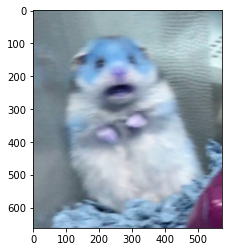

In [26]:
plt.imshow(hamster_img)
plt.show()


We can split images into separate channels.

In [27]:
b, g, r = cv.split(hamster_img)

Red channel:

In [28]:
display(r)

Green channel:

In [29]:
display(g)

Blue channel:

In [30]:
display(b)

We can merge color channels to form a new composite.

In [31]:
merged_hamster_img = cv.merge([b, g, r])
display(merged_hamster_img)

# Bitwise Operators

bitwise operators operate in a binary manner

pixel is true if value is 255 (white)

pixel is false if value is 0 (black)

In [32]:
blank = np.zeros((400, 400), dtype='uint8')

Lets create two shapes, first is a rectangle

In [33]:
rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
display(rectangle)

second is a circle

In [34]:
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)
display(circle)

Bitwise AND

true AND false = false

true AND true = true

false AND false = false

Essentially returns the intersection

In [35]:
bitwise_and = cv.bitwise_and(rectangle, circle)
display(bitwise_and)

Bitwise OR

true OR false = true

true OR true = true

false OR false = false

Essentially returns the union

In [36]:
bitwise_or = cv.bitwise_or(rectangle, circle)
display(bitwise_or)

Bitwise XOR

true XOR false = true

true XOR true = false

false XOR false = false

Essentially returns all non intersecting pixels

In [37]:
bitwise_xor = cv.bitwise_xor(rectangle, circle)
display(bitwise_xor)

Bitwise NOT

NOT true = false

NOT false = true

An operator with two inputs is called a binary operator.

The Bitwise NOT is a 'unary' operator.

In [38]:
bitwise_not = cv.bitwise_not(circle)
display(bitwise_not)

# Masking and Histograms

Using bitwise operators we can perform masking in opencv

Masking allows us to focus on certain parts of an image we want to focus on.

In [39]:
fish_img = cv.imread('fish.jpg')
display(fish_img)

Lets create a mask

In [40]:
blank = np.zeros(fish_img.shape[:2], dtype='uint8')
mask = cv.circle(blank, (fish_img.shape[1]//2, fish_img.shape[0]//2), 250, 255, -1)
display(mask)

Now lets create a masked image

In [41]:
masked_fish_img = cv.bitwise_and(fish_img, fish_img, mask=mask)
display(masked_fish_img)

Using a histogram to see the distribution of pixels within an image. Convert the fish image to grayscale.

In [42]:
gray_fish_img = cv.cvtColor(fish_img, cv.COLOR_BGR2GRAY)
display(gray_fish_img)

Now create a histogram for this image

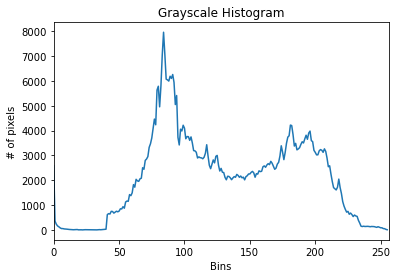

In [43]:
def plot_hist(histogram):
    plt.figure()
    plt.title('Grayscale Histogram')
    plt.xlabel('Bins')
    plt.ylabel('# of pixels')
    plt.plot(histogram)
    plt.xlim([0, 256])
    plt.show()
    
fishstogram = cv.calcHist([gray_fish_img], [0], None, [256], [0, 256]) # ([list of imgs], [channels], mask, [# of bins], [range])
plot_hist(fishstogram)

Now let's make a histogram for the values within the circle mask.

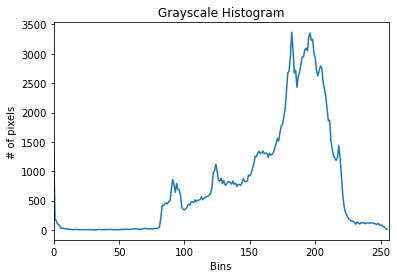

In [44]:
mask_fishstogram = cv.calcHist([gray_fish_img], [0], mask, [256], [0, 256]) # ([list of imgs], [channels], mask, [# of bins], [range])
plot_hist(mask_fishstogram)

# Thesholding / Binarizing Image

Convert each digital number to 0 or 255 depending on whether it is below or above a threshold value. Let's start by importing an armadillo (an objectively cute animal).

In [45]:
armadillo_img = cv.imread('armadillo.jpg')
display(armadillo_img)

convert the image to grayscale

In [46]:
gray_armadillo_img = cv.cvtColor(armadillo_img, cv.COLOR_BGR2GRAY)
display(gray_armadillo_img)

Simple thresholding example:

(try changing the threshold value and rerunning!)

In [47]:
threshold, thresh = cv.threshold(gray_armadillo_img, 150, 255, cv.THRESH_BINARY) # (image, threshold value, max val, type)
print(threshold)
display(thresh)

150.0


Simple thresholding (inverse) example:

In [48]:
threshold, thresh = cv.threshold(gray_armadillo_img, 150, 255, cv.THRESH_BINARY_INV) # (image, threshold value, max val, type)
print(threshold)
display(thresh)

150.0


Adaptive thresholding lets the computer find the optimal threshold value. The image is binarized using that method.

In [49]:
# params = (image, max value, adaptive thresholding method, thresholding type, block value, c value)
adaptive_thresh = cv.adaptiveThreshold(gray_armadillo_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 3)
display(adaptive_thresh)

# Edge Detection

Gradient and edge detections. Gradients are different from edges mathematically, but programatically, you can get away with thinking they are the same thing.

Start by importing Abby's favorite animal: bird

In [50]:
puffin_img = cv.imread('puffin.jpg')
display(puffin_img)

Now resize because that is waaay bigger than I thought.

In [51]:
puffin_img = cv.resize(puffin_img, (puffin_img.shape[1]//3, puffin_img.shape[0]//3))
display(puffin_img)

We already looked at the canny edge detector. We will talk about two other ways. Laplacian and Sobel.

Let's start with Laplacian.

Begin by converting to grayscale:

In [52]:
gray_puffin_img = cv.cvtColor(puffin_img, cv.COLOR_BGR2GRAY)
display(gray_puffin_img)

Now calculate the laplacian edges

In [53]:
# Params = (image, ddepth)
lap_gray_puffin_img = cv.Laplacian(gray_puffin_img, cv.CV_64F)
lap_gray_puffin_img = np.uint8(np.absolute(lap_gray_puffin_img))

display(lap_gray_puffin_img)

Now to use the Sobel algorithm to detect edges

In [54]:
sobelx_gray_puffin_img = cv.Sobel(gray_puffin_img, cv.CV_64F, 1, 0) # gradients computed over the x-axis
sobely_gray_puffin_img = cv.Sobel(gray_puffin_img, cv.CV_64F, 0, 1) # gradients computed over the y-axis

sobel_gray_puffin_img = cv.bitwise_or(sobelx_gray_puffin_img, sobely_gray_puffin_img)
display(sobel_gray_puffin_img)

Now let's look at how the canny method works:

In [55]:
canny_gray_puffin_img = cv.Canny(gray_puffin_img, 150, 175)
display(canny_gray_puffin_img)

# Face Recognition

OpenCV has a built in face recognizer. We will cover how to recognize faces within an image.

First create a list of all the names within the training folder.

In [52]:
haar_cascade = cv.CascadeClassifier('haar_face.txt')
DIR = "faces/train"
people = []

for i in os.listdir(DIR):
    people.append(i)
    
print(people)

['Billy_Bob_Thornton', 'Frank_Ocean', 'Nina_Simone', 'Pedro_Pascal', 'Peggy_Gou']


Now create function to loop through training folder and loop through images. Add faces in these images to training set.

In [53]:
features = [] # image array of faces
labels = [] # whose face does each index belong to?

def create_train():
    
    for person in people:
        
        path = os.path.join(DIR, person) # set path to each person
        label = people.index(person)
        
        for img in os.listdir(path):
            
            img_path = os.path.join(path, img)
            img_array = cv.imread(img_path)
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
            
            # create a rectangle around the face in an image
            face_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
            
            for (x, y, w, h) in face_rect:
                
                # crop the grayscale image to the bounding rectangle
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)

Let's try running it

In [54]:
create_train()

No errors means we can instantiate the face recognizer

In [55]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()

Now we train the recognizer on the features and labels lists

In [57]:
features = np.array(features, dtype='object')
labels = np.array(labels, dtype='int')
face_recognizer.train(features, labels)

Now we need an image to test the code

In [99]:
test_img = cv.imread("faces/validate/Nina_Simone/3.jpg")
gray = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)
display(gray)

Here we predict which face each image belongs to

In [100]:
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

if len(faces_rect) < 1:
    print("No faces found in this photo for some reason.")

for (x, y, w, h) in faces_rect:
    faces_roi = gray[y:y+h, x:x+w]
    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}.')
    display(faces_roi)

Label = Pedro_Pascal with a confidence of 53.44969768177827.
